<a href="https://colab.research.google.com/github/kjdatamc/Data110/blob/main/ArtProject/KHatton_artproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

In [2]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

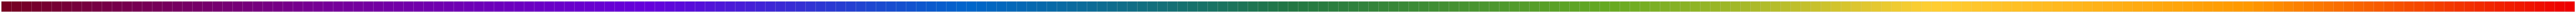

In [3]:
# Create colormap with presentation color palette
cmap = mcolors.LinearSegmentedColormap.from_list('yarn_gradient', ['#770022','#770099','#6600DD','#0066CC','#227744','#66AA22','#FFCF33','#FF9900','#EE0000'])
yarn_palette = [cmap(i) for i in range(cmap.N)]

# Display the colormap
sns.palplot(yarn_palette)
plt.show()

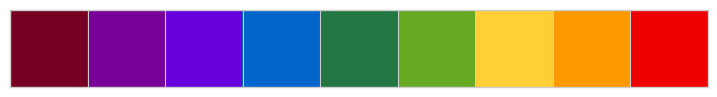

In [4]:
# Create a gradient with 12 colors using interpolation
cmap2 = mcolors.LinearSegmentedColormap.from_list("yarn_gradient2", ['#770022','#770099','#6600DD','#0066CC','#227744','#66AA22','#FFCF33','#FF9900','#EE0000'], N=9)

# Convert the generated colors into a list
yarn_colors = [cmap2(i) for i in range(cmap2.N)]

# Display the gradient
sns.palplot(yarn_colors)
plt.show()

In [5]:
# Import Dataset: Temperature at Dulles Airport Q1 2025
temp_Q1=pd.read_csv("https://raw.githubusercontent.com/kjdatamc/Data110/refs/heads/main/ArtProject/WUnderground_Temp_Data_2025_Q1_Dulles_ERR.csv")

# Examine the Data

In [6]:
# Determine Data Contents (columns, type)
temp_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Count        90 non-null     int64  
 1   Day_Count         90 non-null     int64  
 2   Month             90 non-null     object 
 3   Weekday           90 non-null     object 
 4   Date              90 non-null     object 
 5   Temp_Max          90 non-null     int64  
 6   Temp_Avg          90 non-null     float64
 7   Temp_Min          90 non-null     int64  
 8   Dew_Point_Max     90 non-null     int64  
 9   Dew_Point_Avg     90 non-null     float64
 10  Dew_Point_Min     90 non-null     int64  
 11  Humidity_Max      90 non-null     int64  
 12  Humidity_Avg      90 non-null     float64
 13  Humidity_Min      90 non-null     int64  
 14  Wind_Speed_Max    90 non-null     int64  
 15  Wind_Speed_Avg    90 non-null     float64
 16  Wind_Speed_Min    90 non-null     int64  
 17 

In [7]:
temp_Q1.describe()

,Week_Count,Day_Count,Temp_Max,Temp_Avg,Temp_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_in
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,6.933333,45.500000,48.644444,39.750000,30.322222,30.166667,23.415556,16.844444,75.622222,55.406667,37.822222,18.244444,9.175556,1.588889,29.835556,29.695556,29.554444,0.061778
std,3.729024,26.124701,14.643564,12.269596,11.796808,13.439210,12.419800,12.043844,15.406534,14.552229,15.200959,7.382505,4.253493,2.771826,0.211634,0.227794,0.255792,0.152357
min,1.000000,1.000000,19.000000,13.300000,0.000000,4.000000,-2.800000,-9.000000,44.000000,34.300000,0.000000,5.000000,2.500000,0.000000,29.400000,29.100000,28.800000,0.000000
25%,4.000000,23.250000,36.250000,31.175000,23.000000,20.250000,14.325000,8.000000,61.250000,44.850000,27.000000,12.250000,5.800000,0.000000,29.700000,29.500000,29.400000,0.000000
50%,7.000000,45.500000,48.500000,37.400000,31.000000,30.000000,22.800000,16.500000,75.000000,51.150000,37.000000,17.000000,8.250000,0.000000,29.800000,29.700000,29.500000,0.000000
75%,10.000000,67.750000,59.750000,48.050000,36.750000,39.000000,29.950000,22.000000,89.750000,66.300000,46.000000,24.500000,12.375000,3.000000,30.000000,29.800000,29.700000,0.000000
max,13.000000,90.000000,81.000000,72.900000,66.000000,61.000000,58.100000,54.000000,100.000000,89.900000,83.000000,45.000000,19.700000,10.000000,30.300000,30.200000,30.100000,0.770000


# Create Temp Gauges

In [8]:
# Step 1: Create Max Temp Gauges
def label_max_gauge(row):
   if 0 <= row['Temp_Max'] < 10:
      return 0
   if 10 <= row['Temp_Max'] < 20:
      return 1
   if 20 <= row['Temp_Max'] < 30:
      return 2
   if 30 <= row['Temp_Max'] < 40:
      return 3
   if 40 <= row['Temp_Max'] < 50:
      return 4
   if 50 <= row['Temp_Max'] < 60:
      return 5
   if 60 <= row['Temp_Max'] < 70:
      return 6
   if 70 <= row['Temp_Max'] < 80:
      return 7
   if 80 <= row['Temp_Max'] < 90:
      return 8
   return

In [9]:
# Step 2: Create Min Temp Gauges
def label_min_gauge(row):
   if 0 <= row['Temp_Min'] < 10:
      return 0
   if 10 <= row['Temp_Min'] < 20:
      return 1
   if 20 <= row['Temp_Min'] < 30:
      return 2
   if 30 <= row['Temp_Min'] < 40:
      return 3
   if 40 <= row['Temp_Min'] < 50:
      return 4
   if 50 <= row['Temp_Min'] < 60:
      return 5
   if 60 <= row['Temp_Min'] < 70:
      return 6
   if 70 <= row['Temp_Min'] < 80:
      return 7
   if 80 <= row['Temp_Min'] < 90:
      return 8
   return

In [10]:
# Step 3: Create Temp Gauge Columns
temp_Q1['Temp_Max_Gauge'] = temp_Q1.apply(label_max_gauge, axis=1)
temp_Q1['Temp_Min_Gauge'] = temp_Q1.apply(label_min_gauge, axis=1)

In [11]:
# Check that added columns work
temp_Q1.head()

,Week_Count,Day_Count,Month,Weekday,Date,Temp_Max,Temp_Avg,Temp_Min,Dew_Point_Max,Dew_Point_Avg,...,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_in,Temp_Max_Gauge,Temp_Min_Gauge
0,1,1,JAN,WED,JAN-01-2025,48,43.0,37,42,31.1,...,46,29,14.1,0,29.7,29.4,29.2,0.36,4,3
1,1,2,JAN,THU,JAN-02-2025,41,37.0,35,19,17.6,...,41,25,13.6,5,29.9,29.8,29.7,0.00,4,3
2,1,3,JAN,FRI,JAN-03-2025,41,33.3,27,31,22.9,...,53,25,11.2,0,29.8,29.6,29.5,0.00,4,2
3,1,4,JAN,SAT,JAN-04-2025,30,27.3,24,15,9.7,...,40,25,18.0,10,29.8,29.8,29.6,0.05,3,2
4,1,5,JAN,SUN,JAN-05-2025,34,27.5,16,19,7.8,...,30,10,4.5,0,29.9,29.8,29.8,0.00,3,1


# Stripes (finding an error)

In [12]:
weekly_max = temp_Q1.groupby('Week_Count')['Temp_Max'].max()
weekly_min = temp_Q1.groupby('Week_Count')['Temp_Min'].min()

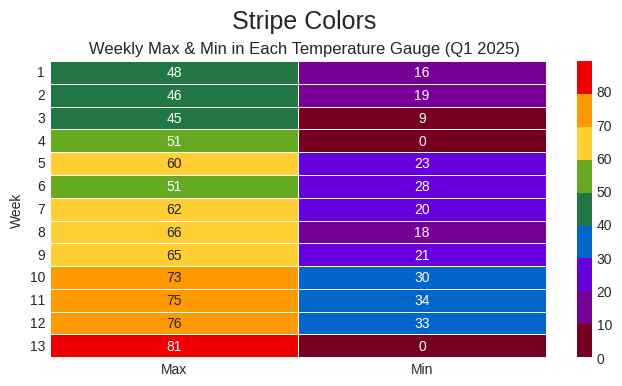

In [13]:
# Create heatmap for weekly highs and lows
df = pd.DataFrame({'Maxi': weekly_max,
 'Mini': weekly_min})


plt.figure(figsize=(8, 4))
plt.subplots_adjust(top=0.85)
plt.suptitle('Stripe Colors             ', fontsize=18)

plt.subplot(1, 1, 1)
sns.heatmap(df, vmin=0, vmax=89, annot=True, cmap=cmap2, linewidths=0.5)
plt.title('   Weekly Max & Min in Each Temperature Gauge (Q1 2025)')
plt.ylabel('Week')
plt.yticks(rotation=0)
plt.xticks([0.5,1.5],['Max','Min'])

plt.show()

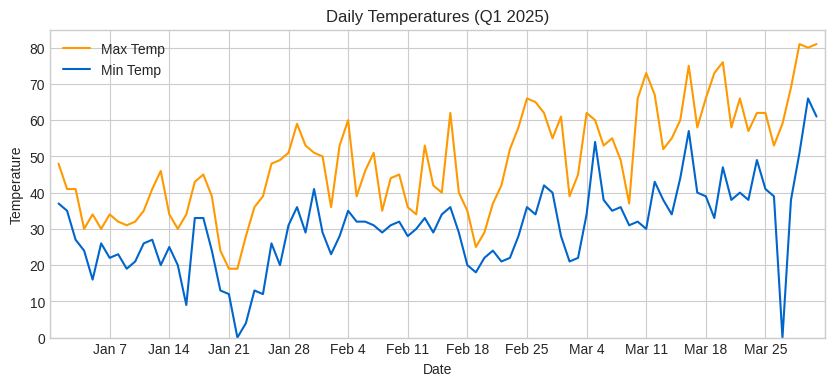

In [14]:
# Plot Line Graphs of min/max daily temp over Q1

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

#max
plt.subplot(1, 1, 1)
plt.plot(temp_Q1['Day_Count'],temp_Q1['Temp_Max'], color='#FF9900', alpha=1, label='Max Temp')
plt.plot(temp_Q1['Day_Count'],temp_Q1['Temp_Min'], color='#0066CC', alpha=1, label='Min Temp')
plt.title('Daily Temperatures (Q1 2025)')
plt.xlabel('Date')
plt.xlim(0,91)
plt.xticks([0,7,14,21,28,35,42,49,56,63,70,77,84,91],['','Jan 7','Jan 14','Jan 21','Jan 28','Feb 4','Feb 11','Feb 18','Feb 25','Mar 4','Mar 11','Mar 18','Mar 25',''])
plt.ylabel('Temperature')
plt.ylim(0,85)
plt.legend()

plt.show()

# Re-import Corrected Dataset

In [15]:
# Import Dataset: Temperature at Dulles Airport Q1 2025
temp_Q1_c=pd.read_csv("https://raw.githubusercontent.com/kjdatamc/Data110/refs/heads/main/ArtProject/WUnderground_Temp_Data_2025_Q1_Dulles.csv")

In [16]:
# Determine Data Contents (columns, type)
temp_Q1_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Count        90 non-null     int64  
 1   Day_Count         90 non-null     int64  
 2   Month             90 non-null     object 
 3   Weekday           90 non-null     object 
 4   Date              90 non-null     object 
 5   Temp_Max          90 non-null     int64  
 6   Temp_Avg          90 non-null     float64
 7   Temp_Min          90 non-null     int64  
 8   Dew_Point_Max     90 non-null     int64  
 9   Dew_Point_Avg     90 non-null     float64
 10  Dew_Point_Min     90 non-null     int64  
 11  Humidity_Max      90 non-null     int64  
 12  Humidity_Avg      90 non-null     float64
 13  Humidity_Min      90 non-null     int64  
 14  Wind_Speed_Max    90 non-null     int64  
 15  Wind_Speed_Avg    90 non-null     float64
 16  Wind_Speed_Min    90 non-null     int64  
 17 

In [17]:
temp_Q1_c.describe()

,Week_Count,Day_Count,Temp_Max,Temp_Avg,Temp_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_in
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,6.933333,45.500000,48.644444,39.750000,30.733333,30.166667,23.415556,16.844444,75.622222,55.406667,37.822222,18.244444,9.175556,1.588889,29.835556,29.695556,29.554444,0.061778
std,3.729024,26.124701,14.643564,12.269596,11.113106,13.439210,12.419800,12.043844,15.406534,14.552229,15.200959,7.382505,4.253493,2.771826,0.211634,0.227794,0.255792,0.152357
min,1.000000,1.000000,19.000000,13.300000,4.000000,4.000000,-2.800000,-9.000000,44.000000,34.300000,0.000000,5.000000,2.500000,0.000000,29.400000,29.100000,28.800000,0.000000
25%,4.000000,23.250000,36.250000,31.175000,23.250000,20.250000,14.325000,8.000000,61.250000,44.850000,27.000000,12.250000,5.800000,0.000000,29.700000,29.500000,29.400000,0.000000
50%,7.000000,45.500000,48.500000,37.400000,31.000000,30.000000,22.800000,16.500000,75.000000,51.150000,37.000000,17.000000,8.250000,0.000000,29.800000,29.700000,29.500000,0.000000
75%,10.000000,67.750000,59.750000,48.050000,36.750000,39.000000,29.950000,22.000000,89.750000,66.300000,46.000000,24.500000,12.375000,3.000000,30.000000,29.800000,29.700000,0.000000
max,13.000000,90.000000,81.000000,72.900000,66.000000,61.000000,58.100000,54.000000,100.000000,89.900000,83.000000,45.000000,19.700000,10.000000,30.300000,30.200000,30.100000,0.770000


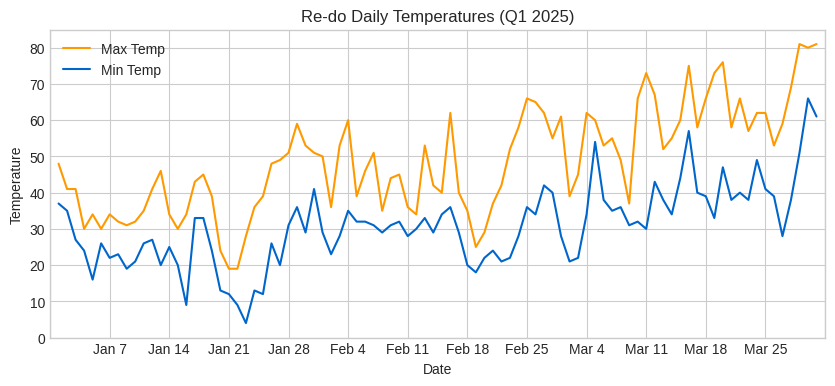

In [18]:
# Plot Line Graphs of min/max daily temp over Q1

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

#max
plt.subplot(1, 1, 1)
plt.plot(temp_Q1_c['Day_Count'],temp_Q1_c['Temp_Max'], color='#FF9900', alpha=1, label='Max Temp')
plt.plot(temp_Q1_c['Day_Count'],temp_Q1_c['Temp_Min'], color='#0066CC', alpha=1, label='Min Temp')
plt.title('Re-do Daily Temperatures (Q1 2025)')
plt.xlabel('Date')
plt.xlim(0,91)
plt.xticks([0,7,14,21,28,35,42,49,56,63,70,77,84,91],['','Jan 7','Jan 14','Jan 21','Jan 28','Feb 4','Feb 11','Feb 18','Feb 25','Mar 4','Mar 11','Mar 18','Mar 25',''])
plt.ylabel('Temperature')
plt.ylim(0,85)
plt.legend()

plt.show()

## Apply Temp Gauges

In [19]:
# Step 3: Create Temp Gauge Columns
temp_Q1_c['Temp_Max_Gauge'] = temp_Q1_c.apply(label_max_gauge, axis=1)
temp_Q1_c['Temp_Min_Gauge'] = temp_Q1_c.apply(label_min_gauge, axis=1)

In [20]:
# Check that added columns work
temp_Q1_c.head()

,Week_Count,Day_Count,Month,Weekday,Date,Temp_Max,Temp_Avg,Temp_Min,Dew_Point_Max,Dew_Point_Avg,...,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_in,Temp_Max_Gauge,Temp_Min_Gauge
0,1,1,JAN,WED,JAN-01-2025,48,43.0,37,42,31.1,...,46,29,14.1,0,29.7,29.4,29.2,0.36,4,3
1,1,2,JAN,THU,JAN-02-2025,41,37.0,35,19,17.6,...,41,25,13.6,5,29.9,29.8,29.7,0.00,4,3
2,1,3,JAN,FRI,JAN-03-2025,41,33.3,27,31,22.9,...,53,25,11.2,0,29.8,29.6,29.5,0.00,4,2
3,1,4,JAN,SAT,JAN-04-2025,30,27.3,24,15,9.7,...,40,25,18.0,10,29.8,29.8,29.6,0.05,3,2
4,1,5,JAN,SUN,JAN-05-2025,34,27.5,16,19,7.8,...,30,10,4.5,0,29.9,29.8,29.8,0.00,3,1


# Stripes

In [21]:
weekly_max_c = temp_Q1_c.groupby('Week_Count')['Temp_Max'].max()
weekly_min_c = temp_Q1_c.groupby('Week_Count')['Temp_Min'].min()

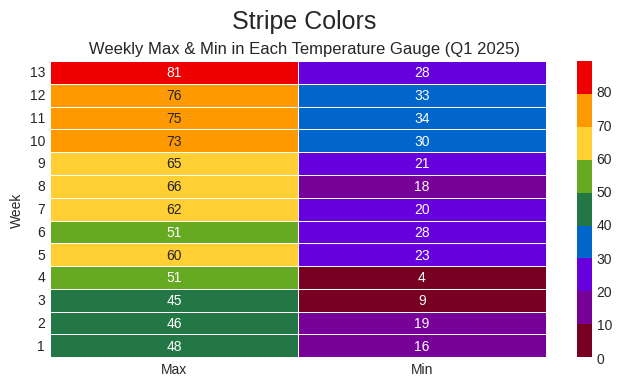

In [22]:
# Create heatmap for weekly highs and lows
df_c = pd.DataFrame({'Maxi': weekly_max_c,
 'Mini': weekly_min_c})

plt.figure(figsize=(8, 4))
plt.subplots_adjust(top=0.85)
plt.suptitle('Stripe Colors             ', fontsize=18)

plt.subplot(1, 1, 1)
ax = sns.heatmap(df_c, vmin=0, vmax=89, annot=True, cmap=cmap2, linewidths=0.5)
plt.title('   Weekly Max & Min in Each Temperature Gauge (Q1 2025)')
plt.ylabel('Week')
plt.yticks(rotation=0)
ax.invert_yaxis()
plt.xticks([0.5,1.5],['Max','Min'])

plt.show()

# Pompoms

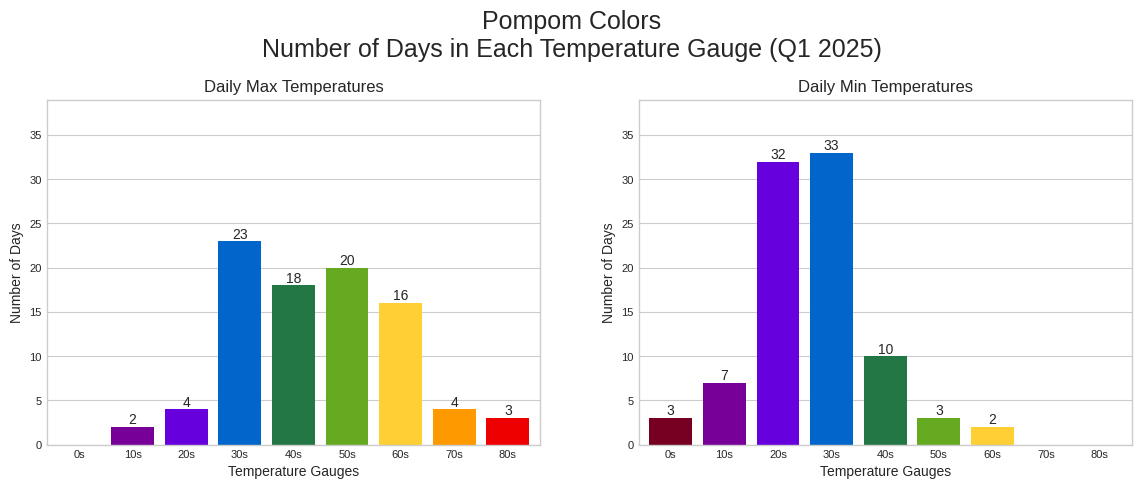

In [23]:
xaxis_temp=['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
xaxis_tempindex=[0, 1, 2, 3, 4, 5, 6, 7, 8]

dailymaxs = temp_Q1_c.groupby('Temp_Max_Gauge')['Temp_Max'].count()
dailymins = temp_Q1_c.groupby('Temp_Min_Gauge')['Temp_Min'].count()

plt.figure(figsize=(14, 5))
plt.subplots_adjust(top=0.8)
plt.suptitle('Pompom Colors\nNumber of Days in Each Temperature Gauge (Q1 2025)', fontsize=18)

plt.subplot(1, 2, 1)

barsmax=plt.bar(dailymaxs.index, dailymaxs.values, color=['#770099','#6600DD','#0066CC','#227744','#66AA22','#FFCF33','#FF9900','#EE0000'], zorder=2) #['#770022','#770099','#6600DD','#0066CC','#227744','#66AA22','#FFCF33','#FF9900','#EE0000']
plt.bar_label(barsmax, fmt='%.0f')
plt.grid(axis='y', zorder=0)
plt.xlabel('Temperature Gauges')
plt.xlim(-.6,8.6)
plt.xticks(xaxis_tempindex, xaxis_temp, fontsize=8)
plt.ylabel('Number of Days')
plt.ylim(0,39)
plt.yticks(fontsize=8)
plt.title('Daily Max Temperatures')
plt.grid(axis='x', visible=False)

plt.subplot(1, 2, 2)

barsmin=plt.bar(dailymins.index, dailymins.values, color=yarn_colors, zorder=2) #['#770022','#770099','#6600DD','#0066CC','#227744','#66AA22','#FFCF33','#FF9900','#EE0000']
plt.bar_label(barsmin, fmt='%.0f')
plt.grid(axis='y', zorder=0)
plt.xlabel('Temperature Gauges')
plt.xlim(-.6,8.6)
plt.xticks(xaxis_tempindex, xaxis_temp, fontsize=8)
plt.ylabel('Number of Days')
plt.ylim(0,39)
plt.yticks(fontsize=8)
plt.title('Daily Min Temperatures')
plt.grid(axis='x', visible=False)


plt.show()

# Curiosity

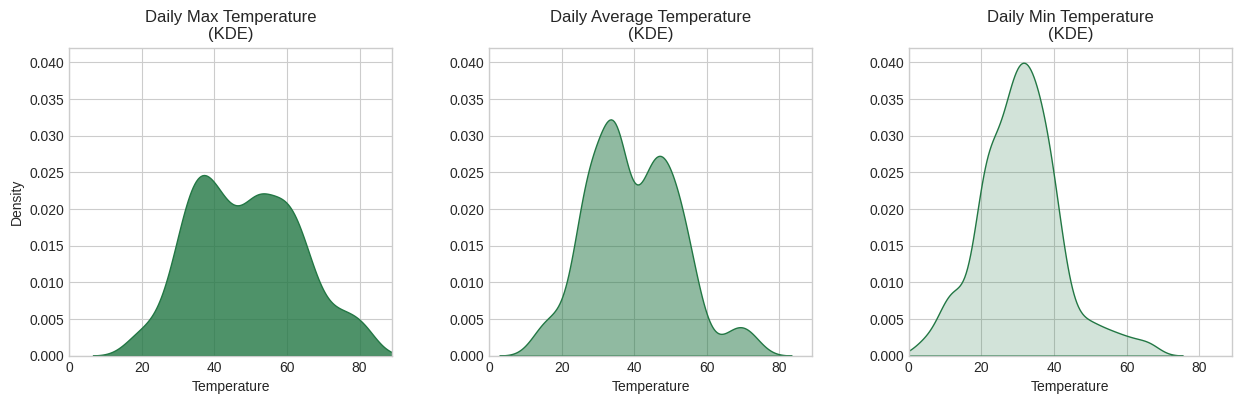

In [24]:
# Plot KDEs of min/max/avg daily temp over Q1
# Opt for side-by-side because overlapping would be difficult to interpret with three distributions
# Maintain same x and y limits for easier 1 to 1 visual comparison


plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

#max
plt.subplot(1, 3, 1)
sns.kdeplot(temp_Q1_c['Temp_Max'], fill=True, bw_adjust=0.7, color='#227744', alpha=0.8)
plt.title('Daily Max Temperature\n(KDE)')
plt.xlabel('Temperature')
plt.xlim(0,89)
plt.ylim(0,0.042)

#avg
plt.subplot(1, 3, 2)
sns.kdeplot(temp_Q1_c['Temp_Avg'], fill=True, bw_adjust=0.7, color='#227744', alpha=0.5)
plt.title('Daily Average Temperature\n(KDE)')
plt.xlabel('Temperature')
plt.xlim(0,89)
plt.ylim(0,0.042)
plt.ylabel('')

#min
plt.subplot(1, 3, 3)
sns.kdeplot(temp_Q1_c['Temp_Min'], fill=True, bw_adjust=0.7, color='#227744', alpha=0.2)
plt.title('Daily Min Temperature\n(KDE)')
plt.xlabel('Temperature')
plt.xlim(0,89)
plt.ylim(0,0.042)
plt.ylabel('')

plt.show()

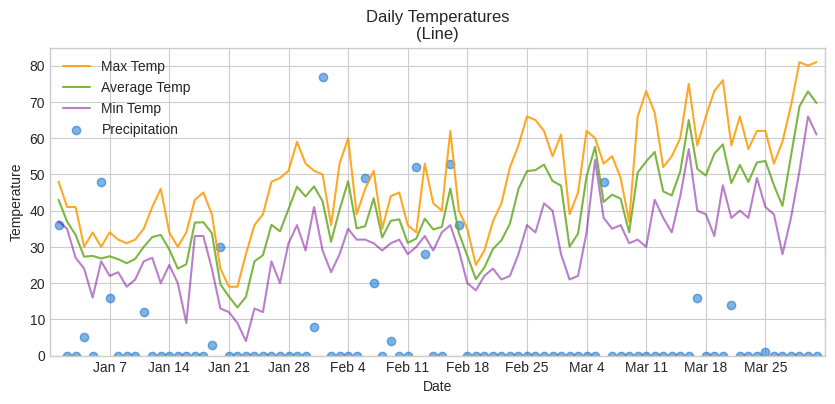

In [25]:
# Plot Line Graphs of min/max/avg daily temp over Q1


plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

#max
plt.subplot(1, 1, 1)
plt.plot(temp_Q1_c['Day_Count'],temp_Q1_c['Temp_Max'], color='#FF9900', alpha=0.85, label='Max Temp')
plt.plot(temp_Q1_c['Day_Count'],temp_Q1_c['Temp_Avg'], color='#66AA22', alpha=0.85, label='Average Temp')
plt.plot(temp_Q1_c['Day_Count'],temp_Q1_c['Temp_Min'], color='#770099', alpha=0.5, label='Min Temp')
plt.scatter(temp_Q1_c['Day_Count'],(temp_Q1_c['Precipitation_in']*100), color='#0066CC', alpha=0.5, label='Precipitation')
plt.title('Daily Temperatures\n(Line)')
plt.xlabel('Date')
plt.xlim(0,91)
plt.xticks([0,7,14,21,28,35,42,49,56,63,70,77,84,91],['','Jan 7','Jan 14','Jan 21','Jan 28','Feb 4','Feb 11','Feb 18','Feb 25','Mar 4','Mar 11','Mar 18','Mar 25',''])
plt.ylabel('Temperature')
plt.ylim(0,85)
plt.legend()

plt.show()

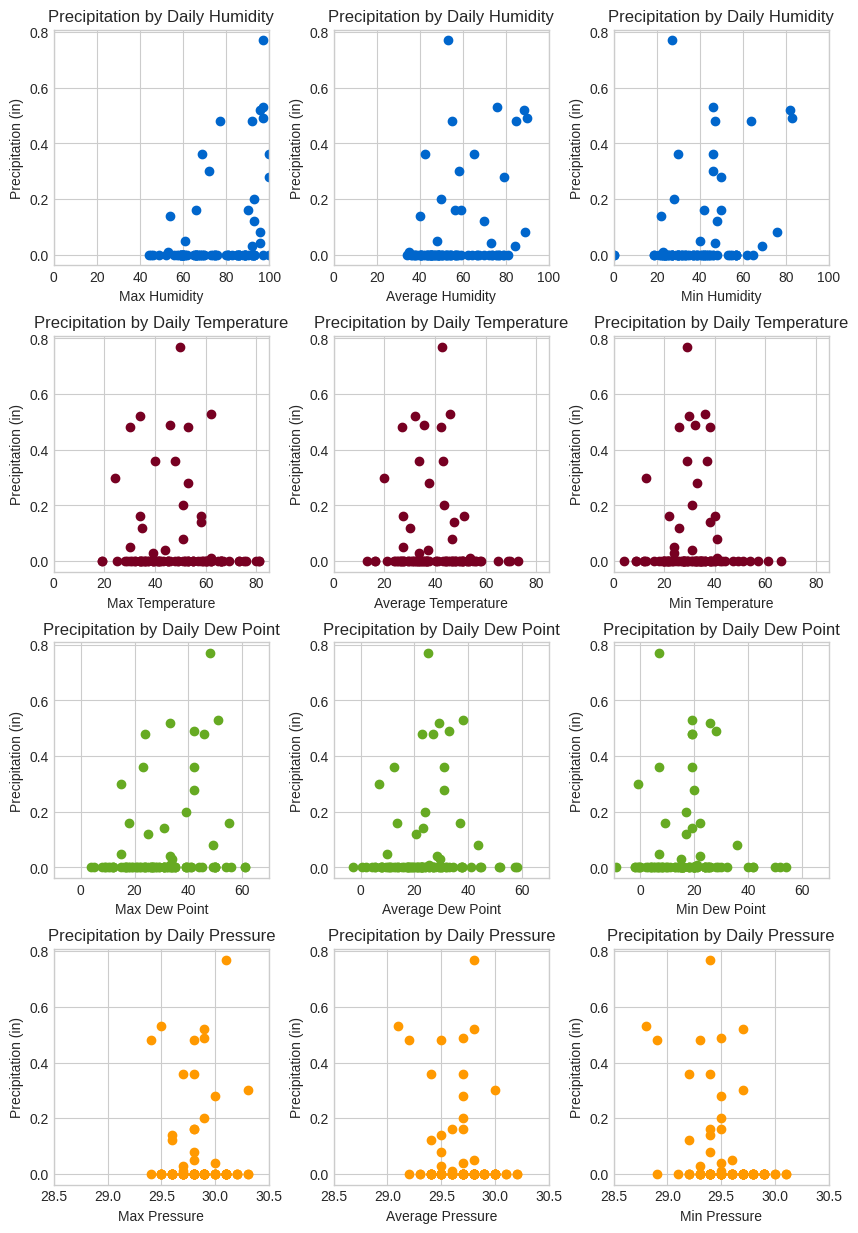

In [26]:
# Plot Scatter Plots of precipitation against other  over Q1


plt.figure(figsize=(10, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#humidity
plt.subplot(4, 3, 1)
plt.scatter(temp_Q1_c['Humidity_Max'],temp_Q1_c['Precipitation_in'], color='#0066CC', alpha=1)
plt.title('Precipitation by Daily Humidity')
plt.xlabel('Max Humidity')
plt.xlim(0,100)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 2)
plt.scatter(temp_Q1_c['Humidity_Avg'],temp_Q1_c['Precipitation_in'], color='#0066CC', alpha=1)
plt.title('Precipitation by Daily Humidity')
plt.xlabel('Average Humidity')
plt.xlim(0,100)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 3)
plt.scatter(temp_Q1_c['Humidity_Min'],temp_Q1_c['Precipitation_in'], color='#0066CC', alpha=1)
plt.title('Precipitation by Daily Humidity')
plt.xlabel('Min Humidity')
plt.xlim(0,100)
plt.ylabel('Precipitation (in)')

#temperature
plt.subplot(4, 3, 4)
plt.scatter(temp_Q1_c['Temp_Max'],temp_Q1_c['Precipitation_in'], color='#770022', alpha=1)
plt.title('Precipitation by Daily Temperature')
plt.xlabel('Max Temperature')
plt.xlim(0,85)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 5)
plt.scatter(temp_Q1_c['Temp_Avg'],temp_Q1_c['Precipitation_in'], color='#770022', alpha=1)
plt.title('Precipitation by Daily Temperature')
plt.xlabel('Average Temperature')
plt.xlim(0,85)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 6)
plt.scatter(temp_Q1_c['Temp_Min'],temp_Q1_c['Precipitation_in'], color='#770022', alpha=1)
plt.title('Precipitation by Daily Temperature')
plt.xlabel('Min Temperature')
plt.xlim(0,85)
plt.ylabel('Precipitation (in)')

#dew point
plt.subplot(4, 3, 7)
plt.scatter(temp_Q1_c['Dew_Point_Max'],temp_Q1_c['Precipitation_in'], color='#66AA22', alpha=1)
plt.title('Precipitation by Daily Dew Point')
plt.xlabel('Max Dew Point')
plt.xlim(-10,70)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 8)
plt.scatter(temp_Q1_c['Dew_Point_Avg'],temp_Q1_c['Precipitation_in'], color='#66AA22', alpha=1)
plt.title('Precipitation by Daily Dew Point')
plt.xlabel('Average Dew Point')
plt.xlim(-10,70)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 9)
plt.scatter(temp_Q1_c['Dew_Point_Min'],temp_Q1_c['Precipitation_in'], color='#66AA22', alpha=1)
plt.title('Precipitation by Daily Dew Point')
plt.xlabel('Min Dew Point')
plt.xlim(-10,70)
plt.ylabel('Precipitation (in)')


#pressure
plt.subplot(4, 3, 10)
plt.scatter(temp_Q1_c['Pressure_Max'],temp_Q1_c['Precipitation_in'], color='#FF9900', alpha=1)
plt.title('Precipitation by Daily Pressure')
plt.xlabel('Max Pressure')
plt.xlim(28.5,30.5)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 11)
plt.scatter(temp_Q1_c['Pressure_Avg'],temp_Q1_c['Precipitation_in'], color='#FF9900', alpha=1)
plt.title('Precipitation by Daily Pressure')
plt.xlabel('Average Pressure')
plt.xlim(28.5,30.5)
plt.ylabel('Precipitation (in)')

plt.subplot(4, 3, 12)
plt.scatter(temp_Q1_c['Pressure_Min'],temp_Q1_c['Precipitation_in'], color='#FF9900', alpha=1)
plt.title('Precipitation by Daily Pressure')
plt.xlabel('Min Pressure')
plt.xlim(28.5,30.5)
plt.ylabel('Precipitation (in)')

plt.show()